In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
import matplotlib.pyplot as plt
import os
import numpy as np

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [56]:
data_dir = pathlib.Path("C:/Users/adnan/OneDrive/Documents/notebook/cvpr_img_dataset")

In [57]:
batch_size = 32
img_height = 32
img_width = 32

training_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 1562 files belonging to 86 classes.
Using 1250 files for training.


In [58]:
train_img = []
train_labels = []

for images, labels in training_ds:
    train_img.append(images.numpy())
    train_labels.append(labels.numpy())

train_img = np.concatenate(train_img, axis=0)
train_labels = np.concatenate(train_labels, axis=0)

print(train_img.shape, train_labels.shape)

(1250, 32, 32, 3) (1250,)


In [59]:
validation_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 1562 files belonging to 86 classes.
Using 312 files for validation.


In [60]:
test_img = []
test_labels = []

for images, labels in validation_ds:
    test_img.append(images.numpy())
    test_labels.append(labels.numpy())

test_img = np.concatenate(test_img, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

print(test_img.shape, test_labels.shape)

(312, 32, 32, 3) (312,)


In [61]:
class_names = training_ds.class_names
print(class_names)

['21-45902-3', '22-46138-1', '22-46139-1', '22-46141-1', '22-46156-1', '22-46258-1', '22-46275-1', '22-46293-1', '22-46342-1', '22-46473-1', '22-46536-1', '22-46590-1', '22-46666-1', '22-46679-1', '22-46877-1', '22-46887-1', '22-46931-1', '22-46945-1', '22-46983-1', '22-47027-1', '22-47180-1', '22-47294-1', '22-47384-2', '22-47402-2', '22-47542-2', '22-47813-2', '22-47884-2', '22-47892-2', '22-47894-2', '22-47898-2', '22-47925-2', '22-47968-2', '22-48005-2', '22-48021-2', '22-48023-2', '22-48039-2', '22-48055-2', '22-48064-2', '22-48091-2', '22-48133-2', '22-48205-2', '22-48310-3', '22-48434-3', '22-48541-3', '22-48569-3', '22-48582-3', '22-48666-3', '22-48682-3', '22-48725-3', '22-48833-3', '22-48841-3', '22-48915-3', '22-49037-3', '22-49068-3', '22-49167-3', '22-49196-3', '22-49331-3', '22-49338-3', '22-49355-3', '22-49370-3', '22-49421-3', '22-49450-3', '22-49451-3', '22-49453-3', '22-49507-3', '22-49575-3', '22-49609-3', '22-49643-3', '22-49745-3', '22-49783-3', '22-49791-3', '22-4

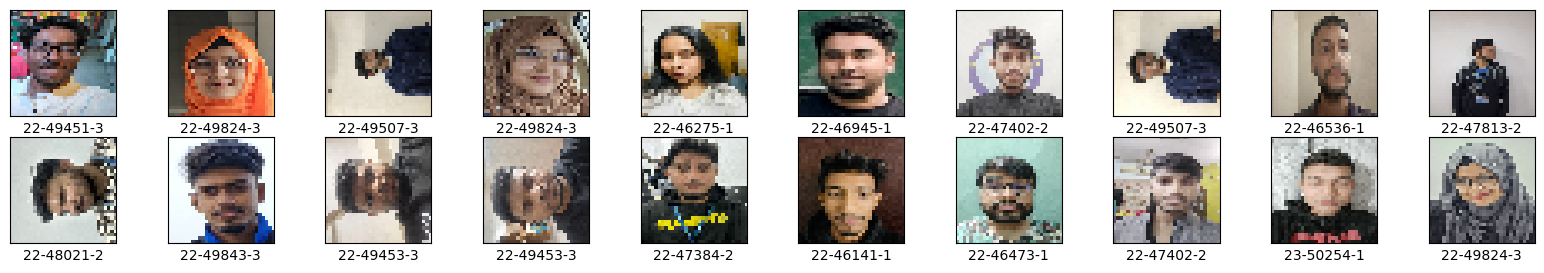

In [62]:
plt.figure(figsize=(20,8))
for i in range(20):
    plt.subplot(5, 10, i+1)
    plt.imshow(train_img[i].astype("uint8"))
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

In [63]:
train_img, test_img = train_img/255.0, test_img/255.0

In [64]:
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
])

model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    
    ## output layer
    layers.Dense(86, activation='softmax')
])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 86)             │        22,102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 342,358 (1.31 MB)

 Trainable params: 342,358 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [66]:
h = model.fit(x=train_img, y=train_labels, epochs=10, validation_split=0.2, batch_size = 16)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.0230 - loss: 4.4257 - val_accuracy: 0.0480 - val_loss: 4.3860
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.0540 - loss: 4.1886 - val_accuracy: 0.0680 - val_loss: 3.8657
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.1660 - loss: 3.4774 - val_accuracy: 0.3040 - val_loss: 2.8424
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.3780 - loss: 2.5088 - val_accuracy: 0.4760 - val_loss: 2.1771
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5350 - loss: 1.8183 - val_accuracy: 0.5880 - val_loss: 1.6759
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6250 - loss: 1.4077 - val_accuracy: 0.5720 - val_loss: 1.5600
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6760 - loss: 1.1698 - val_accuracy: 0.7000 - val_loss: 1.3272
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7250 - loss: 0.9322 - val_accuracy: 0.6720 - v

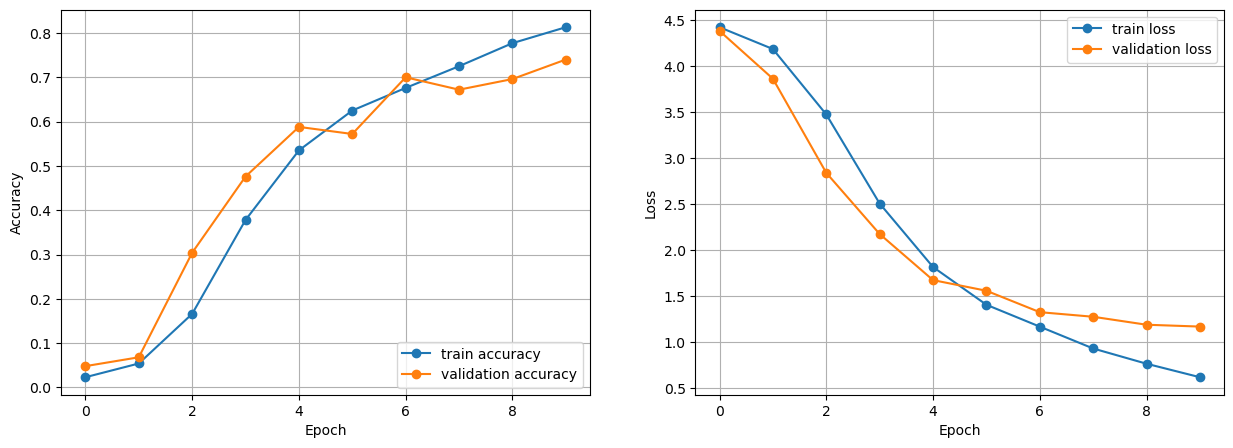

In [67]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [68]:
test_loss, test_acc = model.evaluate(test_img, test_labels)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7436 - loss: 1.0955

Test Accuracy: 0.7435897588729858

Test Loss: 1.095540165901184


In [69]:
predictions = model.predict(test_img)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


In [70]:
predictions[0]

array([6.20970877e-06, 5.60333356e-05, 3.32921263e-05, 1.51401926e-02,
       8.50694341e-05, 9.92087479e-09, 2.16159037e-07, 1.10877896e-04,
       3.59727605e-03, 7.42925695e-05, 3.13010605e-06, 4.30222315e-07,
       2.11143473e-04, 1.58738800e-08, 4.06721793e-02, 1.71700925e-01,
       5.20801891e-09, 1.36076650e-02, 1.94112007e-02, 7.92696155e-05,
       5.15141226e-02, 2.69405954e-02, 8.00433668e-07, 3.56256569e-05,
       9.38933198e-09, 2.55122131e-06, 3.97155695e-08, 2.09218729e-02,
       1.40956843e-07, 2.08918234e-08, 6.78620822e-08, 6.97817555e-08,
       2.84314305e-09, 3.29201555e-08, 1.23823356e-05, 4.75587314e-07,
       1.28514372e-07, 4.35942553e-07, 1.97660294e-03, 1.29684349e-05,
       1.68243106e-02, 2.43221834e-08, 1.55871583e-03, 1.51788839e-03,
       4.22705343e-05, 1.00346153e-06, 4.36191030e-08, 5.77410564e-09,
       3.94589961e-08, 5.81224594e-06, 1.74486381e-09, 6.96592339e-09,
       3.30405688e-04, 2.20434275e-03, 2.86328413e-05, 1.86193304e-07,
      

In [71]:
pred_index = np.argmax(predictions[0])

print(f"The model predicts this image is: {class_names[pred_index]}")

The model predicts this image is: 22-49843-3


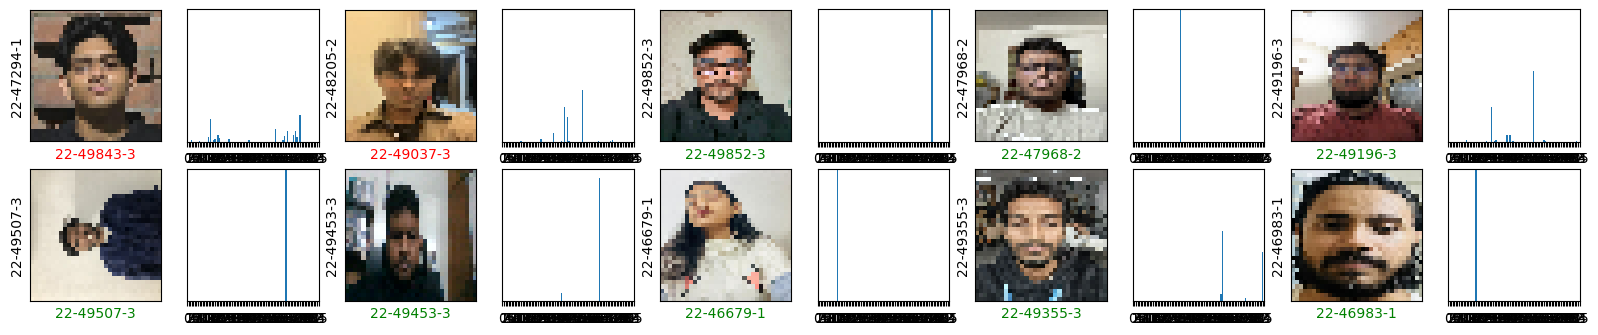

In [72]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
n_classes = predictions.shape[1] if predictions is not None else 3
for i in range(10):
    
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(test_img[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[test_labels[i]])
    if test_labels[i] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')

    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(n_classes), predictions[i])
    plt.yticks([])
    plt.xticks(range(n_classes))
    plt.ylim([0,1])
    plt.xlim([0, n_classes-1])
plt.show()

In [73]:
model.save('ams_cnn.keras')